In [1]:
import pickle as pkl
import os
import pandas as pd

path = os.getcwd()
data_name = 'SMD'
data_file = os.path.join(path, 'processed', data_name)
train_data_ = open(os.path.join(data_file, 'machine-1-1_train.pkl'),'rb')
train_data = pd.DataFrame(pkl.load(train_data_))
test_data_ = open(os.path.join(data_file, 'machine-1-1_test.pkl'),'rb')
test_data = pd.DataFrame(pkl.load(test_data_))

In [2]:
test_data_label_ = open(os.path.join(data_file, 'machine-1-1_test_label.pkl'),'rb')
test_data_label = pd.DataFrame(pkl.load(test_data_label_),columns=['label'])
test_data_label.label

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
28474    0.0
28475    0.0
28476    0.0
28477    0.0
28478    0.0
Name: label, Length: 28479, dtype: float32

In [3]:
anomaly_num = len(test_data_label[test_data_label.label==1])
anomaly_num / len(test_data_label)

0.09459601811861372

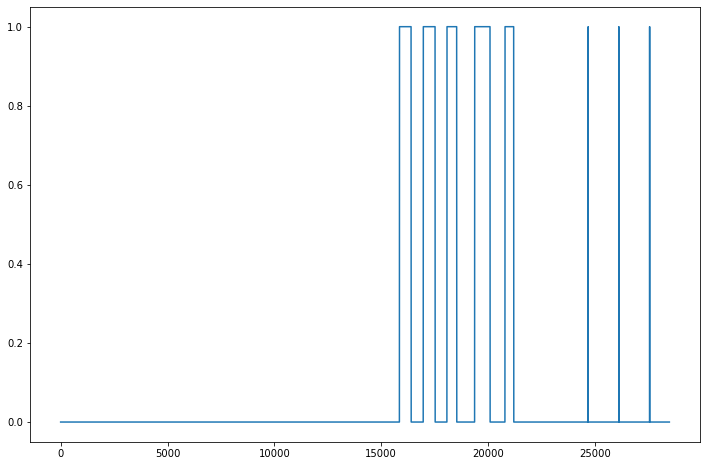

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(test_data_label.label)
plt.show()

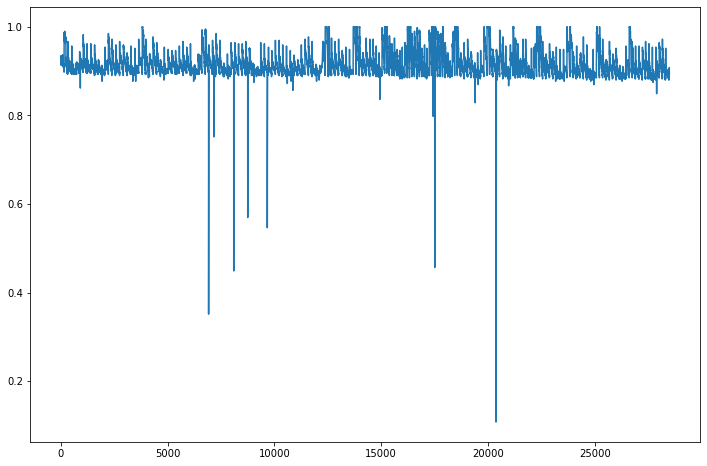

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(test_data[5])
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_train_data = pd.DataFrame(scaler.fit_transform(train_data))
normalized_test_data = pd.DataFrame(scaler.fit_transform(test_data))
normalized_test_data

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.065217,0.065678,0.068156,0.073256,0.0,0.925287,0.269886,0.0,0.031081,0.000000,...,0.0,0.004317,0.068036,0.048893,0.000386,0.000023,0.064432,0.064500,0.0,0.0
1,0.076087,0.080508,0.073742,0.075582,0.0,0.922414,0.270833,0.0,0.031081,0.000122,...,0.0,0.004317,0.070020,0.050437,0.000386,0.000011,0.065228,0.065224,0.0,0.0
2,0.065217,0.064619,0.069273,0.073256,0.0,0.919540,0.270833,0.0,0.030940,0.000366,...,0.0,0.004317,0.069684,0.055069,0.000386,0.000034,0.067111,0.067178,0.0,0.0
3,0.076087,0.048729,0.061452,0.069768,0.0,0.919540,0.268940,0.0,0.027250,0.000244,...,0.0,0.005756,0.073253,0.051467,0.000000,0.000023,0.066676,0.066744,0.0,0.0
4,0.076087,0.051907,0.060335,0.069768,0.0,0.925287,0.269886,0.0,0.030940,0.000244,...,0.0,0.004317,0.070932,0.051467,0.000386,0.000011,0.066604,0.066671,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28474,0.065217,0.051907,0.045810,0.046512,0.0,0.896551,0.252841,0.0,0.043571,0.000244,...,0.0,0.027339,0.046733,0.040144,0.000000,0.000011,0.042931,0.043000,0.0,0.0
28475,0.054347,0.025424,0.036871,0.043024,0.0,0.893678,0.252841,0.0,0.032501,0.000000,...,0.0,0.027339,0.047438,0.048893,0.000000,0.000045,0.046550,0.046619,0.0,0.0
28476,0.054347,0.080508,0.048044,0.046512,0.0,0.896551,0.253788,0.0,0.026114,0.000611,...,0.0,0.027339,0.046797,0.040144,0.000386,0.000034,0.043003,0.043000,0.0,0.0
28477,0.054347,0.056144,0.045810,0.045350,0.0,0.890805,0.252841,0.0,0.033210,0.000122,...,0.0,0.027339,0.041884,0.043232,0.000000,0.000034,0.039890,0.039959,0.0,0.0


In [7]:
from scipy import stats
import pprint
import numpy as np

correlation_txn_failure = {}
for metric in normalized_test_data.columns[:]:
    r,p = stats.pearsonr(test_data[metric], test_data_label.label)
    correlation_txn_failure[metric] = (r,p)
correlation_txn_failure

/Users/ruyuexin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


{0: (0.6973527396696735, 0.0),
 1: (0.30764505836646333, 0.0),
 2: (0.3175970455564924, 0.0),
 3: (0.3038517526821894, 0.0),
 4: (nan, nan),
 5: (0.11743536033480964, 5.376067656024853e-88),
 6: (0.2525655682687791, 0.0),
 7: (nan, nan),
 8: (0.1337066473039637, 9.969331195518177e-114),
 9: (0.1663960964129524, 6.696615466525581e-176),
 10: (0.14804277442789915, 2.953306774696296e-139),
 11: (0.23684414196135742, 0.0),
 12: (0.24368784191147552, 0.0),
 13: (0.13857288789582525, 4.316762166030914e-122),
 14: (0.10251825803745851, 2.1274541372228407e-67),
 15: (0.14621726761579826, 7.428515327812208e-136),
 16: (nan, nan),
 17: (nan, nan),
 18: (0.22611279095465234, 0.0),
 19: (0.26760023429824426, 0.0),
 20: (0.2744659032917104, 0.0),
 21: (0.28331286338284717, 0.0),
 22: (-0.10442223127834657, 7.196404952192433e-70),
 23: (0.13592296748240043, 1.6898665032624605e-117),
 24: (0.3099196607365322, 0.0),
 25: (0.13494195376510357, 8.032214575535645e-116),
 26: (0.073354802038049, 2.7707175

In [8]:
txn_failure_correlation = pd.DataFrame.from_dict(correlation_txn_failure, orient='index').rename(columns={0:'r', 1:'p-value'}).sort_values('r', ascending=False)
txn_failure_correlation = txn_failure_correlation.dropna(axis=0, how='any')
#print(txn_failure_correlation)
txn_failure_correlation = txn_failure_correlation[txn_failure_correlation['p-value']<0.05]
txn_failure_correlation = txn_failure_correlation[np.abs(txn_failure_correlation['r'])>0.5]
print(txn_failure_correlation)

          r  p-value
0  0.697353      0.0


In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_train_data = pca.fit_transform(normalized_train_data)
pca_test_data = pca.fit_transform(normalized_test_data)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.6472448  0.23495755 0.03814473 0.01958585 0.01584372]
[67.19859  40.487465 16.31335  11.689532 10.513675]


## Ensemble

In [10]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import metrics

from pyod.models.combination import aom, moa, average, maximization, majority_vote
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [11]:
def pred_labels(y_test, test_scores):
    fpr, tpr, thresholds = roc_curve(y_test, test_scores)
    cutoff = thresholds[np.argmax(tpr - fpr)]
    pred_label = []
    for each in test_scores:
        if each > cutoff:
            pred_label.append(1)
        else:
            pred_label.append(0)    
    return pred_label

In [12]:
def cal_eval(label, pred_label, scores):
    pr = round(metrics.precision_score(label, pred_label, average='macro'), ndigits=4)
    re = round(metrics.recall_score(label, pred_label, average='macro'), ndigits=4)
    f1 = round(metrics.f1_score(label, pred_label, average='macro'), ndigits=4)
    roc = round(roc_auc_score(label, scores), ndigits=4)
    return pr,re,f1,roc

In [13]:
X_train = pca_test_data
X_test = pca_test_data
y_train = test_data_label
y_test = test_data_label

In [14]:
outliers_fraction = np.count_nonzero(y_train) / len(y_train)
outliers_percentage = round(outliers_fraction * 100, ndigits=4)
    
random_state = np.random.RandomState(42)
classifiers = {
        #'Isolation Forest': IForest(contamination=outliers_fraction,
        #                            random_state=random_state),
        #'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        #'Local Outlier Factor (LOF)': LOF(
        #    contamination=outliers_fraction),
        'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction)
    }

n_clf = len(classifiers)
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
p_labels = np.zeros([X_test.shape[0], n_clf])

i = 0
train_duration = 0
test_duration = 0
for clf_name, clf in classifiers.items():
    t0 = time()
    clf.fit(X_train)
    t1 = time()
    test_sccore = clf.decision_function(X_test)
    t_t = time()
    test_mean_score = np.nanmean(test_scores)
    test_scores[np.isnan(test_scores)] = test_mean_score
    test_scores[:, i] = test_sccore
    p_labels[:, i] = pred_labels(y_test, test_sccore)
    i += 1
    print('Base detector %i is fitted for prediction' % i)
    train_duration += round(t1 - t0, ndigits=4)
    test_duration += round(t_t - t1, ndigits=4)
    
# standardize test score
test_scores_norm = standardizer(test_scores)
print(train_duration)

Base detector 1 is fitted for prediction
67.4012


## Keras

In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
from time import time

#train_x, test_x, train_y, test_y = train_test_split(test_scores_norm, y_test, test_size=0.5, random_state=random_state)
train_x, test_x, train_y, test_y = train_test_split(test_scores_norm[:,0], y_test, test_size=0.7, random_state=random_state)

In [16]:
train_x = train_x.reshape(len(train_x),1)

In [17]:
def ensemble_mlp():
    df_columns = ['Precision', 'Recall', 'F1 score', 'AUC', 'Train time', 'Test time']
    enm_mlp_df = pd.DataFrame(columns=df_columns)

    t2 = time()
    model = models.Sequential()
    # Input - Layer
    model.add(layers.Dense(4, activation = "relu", input_shape=(len(train_y),1)))
    model.add(layers.Dense(20, activation = "relu"))
    model.add(layers.Dense(20, activation = "relu"))
    # Output- Layer
    model.add(layers.Dense(1, activation = "sigmoid"))
    model.summary()
    # compiling the model
    model.compile(
        optimizer = "adam",
        loss = "binary_crossentropy",
        metrics = ["accuracy"]
    )
    results = model.fit(
     train_x, train_y,
     epochs= 100,
     batch_size = 20,
     validation_data = (train_x, train_y)
    )
    t3 = time()
    #print(results.history['val_accuracy'])
    pred_test = model.predict(test_scores_norm[:,0].reshape(len(test_scores_norm),1)).reshape(-1,1)
    #pred_test = model.predict(test_scores_norm)
    #pred_test = model.predict(test_x)
    t4 = time()
    train_time = t3 - t2
    test_time = t4 - t3
    train_time_mlp =  round(train_duration+train_time, ndigits=4)
    test_time_mlp = round(train_duration+test_time, ndigits=4)
    
    pred_nn = []
    for each in pred_test:
        if each[0] > 0.5:
            pred_nn.append(1)
        else:
            pred_nn.append(0)
    print(y_test.shape)
    print(pred_test.shape)
    pr_mlp, re_mlp, f1_mlp, roc_mlp = cal_eval(y_test, pred_nn, pred_test)
    #pr_mlp, re_mlp, f1_mlp, roc_mlp = cal_eval(test_y, pred_nn, pred_test)
    enm_mlp = pd.DataFrame([pr_mlp, re_mlp, f1_mlp, roc_mlp, train_time_mlp, test_time_mlp]).transpose()
    enm_mlp.columns = df_columns
    enm_mlp_df = pd.concat([enm_mlp_df, enm_mlp], axis=0)
    return enm_mlp_df 

In [18]:
df_columns = ['Precision', 'Recall', 'F1 score', 'AUC', 'Train time', 'Test time']
t_enm_mlp_df = pd.DataFrame(columns=df_columns)
for i in range(10):
    print(i)
    enm_mlp = ensemble_mlp()
    t_enm_mlp_df = pd.concat([t_enm_mlp_df, enm_mlp], axis=0, ignore_index=True)

0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8543, 4)           8         
_________________________________________________________________
dense_1 (Dense)              (None, 8543, 20)          100       
_________________________________________________________________
dense_2 (Dense)              (None, 8543, 20)          420       
_________________________________________________________________
dense_3 (Dense)              (None, 8543, 1)           21        
Total params: 549
Trainable params: 549
Non-trainable params: 0
_________________________________________________________________


2023-05-24 16:30:30.093231: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 16:30:30.370754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
428/428 [==============================] - 14s 2ms/step - loss: 0.5100 - accuracy: 0.8879 - val_loss: 0.2436 - val_accuracy: 0.9154
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.9139 - val_loss: 0.2381 - val_accuracy: 0.9150
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9105 - val_loss: 0.2342 - val_accuracy: 0.9148
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9083 - val_loss: 0.2344 - val_accuracy: 0.9140
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9214 - val_loss: 0.2298 - val_accuracy: 0.9151
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9193 - val_loss: 0.2276 - val_accuracy: 0.9151
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9120 - val_loss: 0.2264 - val_accuracy: 0.914

Epoch 51/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9125 - val_loss: 0.2238 - val_accuracy: 0.9144
Epoch 52/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9196 - val_loss: 0.2244 - val_accuracy: 0.9149
Epoch 53/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2268 - accuracy: 0.9137 - val_loss: 0.2228 - val_accuracy: 0.9144
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9136 - val_loss: 0.2230 - val_accuracy: 0.9150
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9156 - val_loss: 0.2233 - val_accuracy: 0.9153
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.9153 - val_loss: 0.2237 - val_accuracy: 0.9147
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9168 - val_loss: 0.2234 - val_accuracy:

428/428 [==============================] - 2s 2ms/step - loss: 0.4260 - accuracy: 0.9048 - val_loss: 0.2463 - val_accuracy: 0.9059
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9088 - val_loss: 0.2430 - val_accuracy: 0.9059
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9063 - val_loss: 0.2421 - val_accuracy: 0.9059
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.9045 - val_loss: 0.2403 - val_accuracy: 0.9059
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9069 - val_loss: 0.2393 - val_accuracy: 0.9059
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.9102 - val_loss: 0.2395 - val_accuracy: 0.9059
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9065 - val_loss: 0.2386 - val_accuracy: 0.9059
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.9075 - val_loss: 0.2383 - val_accuracy: 0.9059
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9063 - val_loss: 0.2383 - val_accuracy: 0.9059
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9095 - val_loss: 0.2382 - val_accuracy: 0.9059
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9040 - val_loss: 0.2382 - val_accuracy: 0.9059
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9091 - val_loss: 0.2382 - val_accuracy: 0.9059
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.9045 - val_loss: 0.2382 - val_accuracy: 0.9059
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2329 - accuracy: 0.9118 - val_loss: 0.2383 - val_accuracy: 0.9059
Epoch

428/428 [==============================] - 2s 2ms/step - loss: 0.4057 - accuracy: 0.9099 - val_loss: 0.2327 - val_accuracy: 0.9149
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9118 - val_loss: 0.2284 - val_accuracy: 0.9150
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.9096 - val_loss: 0.2258 - val_accuracy: 0.9145
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9144 - val_loss: 0.2257 - val_accuracy: 0.9147
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9140 - val_loss: 0.2240 - val_accuracy: 0.9137
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9142 - val_loss: 0.2233 - val_accuracy: 0.9154
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9157 - val_loss: 0.2240 - val_accuracy: 0.9137
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2135 - accuracy: 0.9190 - val_loss: 0.2228 - val_accuracy: 0.9147
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.9163 - val_loss: 0.2231 - val_accuracy: 0.9154
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.9134 - val_loss: 0.2224 - val_accuracy: 0.9150
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9122 - val_loss: 0.2229 - val_accuracy: 0.9154
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.9134 - val_loss: 0.2228 - val_accuracy: 0.9144
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2329 - accuracy: 0.9116 - val_loss: 0.2226 - val_accuracy: 0.9145
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.9143 - val_loss: 0.2225 - val_accuracy: 0.9143
Epoch

428/428 [==============================] - 2s 2ms/step - loss: 0.4797 - accuracy: 0.7663 - val_loss: 0.2435 - val_accuracy: 0.9059
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9053 - val_loss: 0.2409 - val_accuracy: 0.9059
Epoch 3/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2357 - accuracy: 0.9092 - val_loss: 0.2399 - val_accuracy: 0.9059
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9099 - val_loss: 0.2397 - val_accuracy: 0.9059
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9073 - val_loss: 0.2388 - val_accuracy: 0.9059
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9055 - val_loss: 0.2385 - val_accuracy: 0.9059
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9092 - val_loss: 0.2393 - val_accuracy: 0.9059
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9079 - val_loss: 0.2385 - val_accuracy: 0.9059
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.9014 - val_loss: 0.2382 - val_accuracy: 0.9059
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9043 - val_loss: 0.2383 - val_accuracy: 0.9059
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9025 - val_loss: 0.2384 - val_accuracy: 0.9059
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9082 - val_loss: 0.2390 - val_accuracy: 0.9059
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9054 - val_loss: 0.2384 - val_accuracy: 0.9059
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.9027 - val_loss: 0.2384 - val_accuracy: 0.9059
Epoch

428/428 [==============================] - 2s 2ms/step - loss: 0.4794 - accuracy: 0.8947 - val_loss: 0.2333 - val_accuracy: 0.9153
Epoch 2/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2272 - accuracy: 0.9153 - val_loss: 0.2299 - val_accuracy: 0.9143
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9159 - val_loss: 0.2270 - val_accuracy: 0.9150
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9168 - val_loss: 0.2261 - val_accuracy: 0.9151
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9174 - val_loss: 0.2246 - val_accuracy: 0.9150
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9148 - val_loss: 0.2239 - val_accuracy: 0.9153
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2195 - accuracy: 0.9163 - val_loss: 0.2236 - val_accuracy: 0.9155
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9183 - val_loss: 0.2236 - val_accuracy: 0.9154
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9146 - val_loss: 0.2227 - val_accuracy: 0.9153
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9219 - val_loss: 0.2234 - val_accuracy: 0.9147
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9167 - val_loss: 0.2229 - val_accuracy: 0.9150
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9141 - val_loss: 0.2226 - val_accuracy: 0.9154
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9146 - val_loss: 0.2228 - val_accuracy: 0.9153
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.9181 - val_loss: 0.2228 - val_accuracy: 0.9155
Epoch

428/428 [==============================] - 2s 2ms/step - loss: 0.4600 - accuracy: 0.9025 - val_loss: 0.2379 - val_accuracy: 0.9145
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9168 - val_loss: 0.2297 - val_accuracy: 0.9144
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9150 - val_loss: 0.2277 - val_accuracy: 0.9154
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9131 - val_loss: 0.2268 - val_accuracy: 0.9137
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.9118 - val_loss: 0.2253 - val_accuracy: 0.9153
Epoch 6/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2232 - accuracy: 0.9163 - val_loss: 0.2253 - val_accuracy: 0.9154
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9188 - val_loss: 0.2253 - val_accuracy: 0.9137
Epoch 8/100

428/428 [==============================] - 1s 1ms/step - loss: 0.2263 - accuracy: 0.9130 - val_loss: 0.2231 - val_accuracy: 0.9154
Epoch 54/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2151 - accuracy: 0.9170 - val_loss: 0.2229 - val_accuracy: 0.9153
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9158 - val_loss: 0.2230 - val_accuracy: 0.9151
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2200 - accuracy: 0.9154 - val_loss: 0.2226 - val_accuracy: 0.9151
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2159 - accuracy: 0.9181 - val_loss: 0.2226 - val_accuracy: 0.9148
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9220 - val_loss: 0.2234 - val_accuracy: 0.9143
Epoch 59/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2245 - accuracy: 0.9128 - val_loss: 0.2228 - val_accuracy: 0.9153
Epoch

428/428 [==============================] - 2s 2ms/step - loss: 0.4752 - accuracy: 0.9122 - val_loss: 0.2495 - val_accuracy: 0.9141
Epoch 2/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2372 - accuracy: 0.9176 - val_loss: 0.2375 - val_accuracy: 0.9150
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.9112 - val_loss: 0.2304 - val_accuracy: 0.9149
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.9111 - val_loss: 0.2300 - val_accuracy: 0.9142
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9150 - val_loss: 0.2306 - val_accuracy: 0.9126
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9199 - val_loss: 0.2252 - val_accuracy: 0.9151
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9193 - val_loss: 0.2252 - val_accuracy: 0.9153
Epoch 8/100

428/428 [==============================] - 1s 1ms/step - loss: 0.2258 - accuracy: 0.9123 - val_loss: 0.2226 - val_accuracy: 0.9150
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9135 - val_loss: 0.2233 - val_accuracy: 0.9155
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9158 - val_loss: 0.2228 - val_accuracy: 0.9150
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9128 - val_loss: 0.2228 - val_accuracy: 0.9147
Epoch 57/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2296 - accuracy: 0.9127 - val_loss: 0.2229 - val_accuracy: 0.9154
Epoch 58/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2285 - accuracy: 0.9129 - val_loss: 0.2233 - val_accuracy: 0.9144
Epoch 59/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2191 - accuracy: 0.9161 - val_loss: 0.2227 - val_accuracy: 0.9153
Epoch

428/428 [==============================] - 2s 3ms/step - loss: 0.4829 - accuracy: 0.9009 - val_loss: 0.2341 - val_accuracy: 0.9149
Epoch 2/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2289 - accuracy: 0.9170 - val_loss: 0.2297 - val_accuracy: 0.9153
Epoch 3/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2420 - accuracy: 0.9093 - val_loss: 0.2316 - val_accuracy: 0.9138
Epoch 4/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2340 - accuracy: 0.9130 - val_loss: 0.2255 - val_accuracy: 0.9151
Epoch 5/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2229 - accuracy: 0.9163 - val_loss: 0.2262 - val_accuracy: 0.9149
Epoch 6/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2272 - accuracy: 0.9136 - val_loss: 0.2235 - val_accuracy: 0.9151
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.9177 - val_loss: 0.2243 - val_accuracy: 0.9154
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9140 - val_loss: 0.2221 - val_accuracy: 0.9154
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9152 - val_loss: 0.2222 - val_accuracy: 0.9145
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9141 - val_loss: 0.2222 - val_accuracy: 0.9148
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9136 - val_loss: 0.2224 - val_accuracy: 0.9154
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9129 - val_loss: 0.2222 - val_accuracy: 0.9149
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9110 - val_loss: 0.2224 - val_accuracy: 0.9148
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9129 - val_loss: 0.2222 - val_accuracy: 0.9148
Epoch

428/428 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.9131 - val_loss: 0.2404 - val_accuracy: 0.9154
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.9166 - val_loss: 0.2301 - val_accuracy: 0.9150
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9115 - val_loss: 0.2258 - val_accuracy: 0.9154
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9147 - val_loss: 0.2252 - val_accuracy: 0.9154
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9154 - val_loss: 0.2268 - val_accuracy: 0.9151
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.9140 - val_loss: 0.2231 - val_accuracy: 0.9153
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9143 - val_loss: 0.2239 - val_accuracy: 0.9154
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9181 - val_loss: 0.2223 - val_accuracy: 0.9151
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9116 - val_loss: 0.2224 - val_accuracy: 0.9147
Epoch 55/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.9126 - val_loss: 0.2223 - val_accuracy: 0.9150
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2140 - accuracy: 0.9198 - val_loss: 0.2225 - val_accuracy: 0.9145
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.9156 - val_loss: 0.2226 - val_accuracy: 0.9133
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9149 - val_loss: 0.2255 - val_accuracy: 0.9137
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9080 - val_loss: 0.2226 - val_accuracy: 0.9153
Epoch

428/428 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.9096 - val_loss: 0.2550 - val_accuracy: 0.9129
Epoch 2/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.9148 - val_loss: 0.2312 - val_accuracy: 0.9144
Epoch 3/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2395 - accuracy: 0.9126 - val_loss: 0.2268 - val_accuracy: 0.9144
Epoch 4/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9187 - val_loss: 0.2264 - val_accuracy: 0.9137
Epoch 5/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9145 - val_loss: 0.2247 - val_accuracy: 0.9154
Epoch 6/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9177 - val_loss: 0.2257 - val_accuracy: 0.9153
Epoch 7/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.9134 - val_loss: 0.2258 - val_accuracy: 0.9137
Epoch 8/100

428/428 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.9218 - val_loss: 0.2231 - val_accuracy: 0.9150
Epoch 54/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9137 - val_loss: 0.2231 - val_accuracy: 0.9151
Epoch 55/100
428/428 [==============================] - 1s 1ms/step - loss: 0.2213 - accuracy: 0.9158 - val_loss: 0.2230 - val_accuracy: 0.9147
Epoch 56/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9199 - val_loss: 0.2247 - val_accuracy: 0.9149
Epoch 57/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9182 - val_loss: 0.2235 - val_accuracy: 0.9137
Epoch 58/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9142 - val_loss: 0.2229 - val_accuracy: 0.9151
Epoch 59/100
428/428 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9132 - val_loss: 0.2232 - val_accuracy: 0.9144
Epoch

In [19]:
print('Ensemble mlp')
metrics = ['Precision', 'Recall', 'F1 score', 'AUC', 'Train time', 'Test time']
mean_mlp = []
std_mlp = []
for each in metrics:
    mean_mlp.append(round(t_enm_mlp_df[each].mean(), ndigits=4))
    std_mlp.append(round(t_enm_mlp_df[each].std(), ndigits=4))
print(mean_mlp)
print(std_mlp)
t_enm_mlp_df

Ensemble mlp
[0.7382, 0.5592, 0.5779, 0.8495, 117.4519, 67.8365]
[0.151, 0.0324, 0.0554, 0.0135, 4.3103, 0.0478]


,Precision,Recall,F1 score,AUC,Train time,Test time
0,0.8195,0.5657,0.5922,0.8559,127.1384,67.9558
1,0.4527,0.5000,0.4752,0.8240,115.2460,67.8536
2,0.7929,0.5860,0.6197,0.8551,114.7007,67.8243
3,0.4527,0.5000,0.4752,0.8238,114.7314,67.8170
4,0.8016,0.5812,0.6138,0.8564,117.1932,67.8251
5,0.8342,0.5625,0.5877,0.8568,118.0349,67.8216
6,0.7926,0.5877,0.6220,0.8541,122.3532,67.8687
7,0.8122,0.5730,0.6026,0.8569,117.8220,67.7975
8,0.8118,0.5687,0.5964,0.8558,113.4779,67.8016
9,0.8118,0.5675,0.5946,0.8566,113.8208,67.7999
